In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.base import BaseEstimator

class Perceptron(BaseEstimator):
    def __init__(self, alpha, n_epochs):
        self.alpha = alpha        # the learning rate
        self.n_epochs = n_epochs  # number of training iterations
        
    def fit(self, X, y):
        (n, m) = X.shape  # n is the number of samples, m is the number of features
        
        # Initialize the weights to small random values
        self.w = np.random.randn(m)
        self.b = 0
        
        # The training loop
        for epoch in range(self.n_epochs):
            n_errors = 0  # number of misclassification errors
            
            for i in range(n):
                o = self.predict(X[i])
                if o != y[i]:
                    # Apply the perceptron learning rule
                    self.w += self.alpha * (y[i] - o) * X[i]
                    self.b += self.alpha * (y[i] - o)
                    n_errors += 1
            
            # Compute the accuracy on the training set
            accuracy = 1 - (n_errors / n)
            print(f'Epoch {epoch + 1}: accuracy = {accuracy:.3f}')
            
            # Stop the training when there are no more errors
            if n_errors == 0:
                break
                
    def predict(self, X):
        z = X @ self.w + self.b
        return np.heaviside(z, 1)  # the step function

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=0.5)

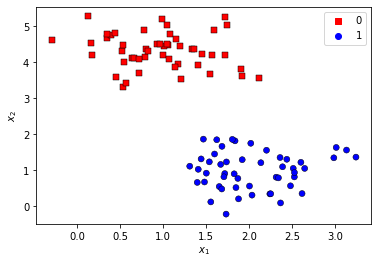

In [4]:
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig('figures/blobs_data.pdf')

In [5]:
perceptron = Perceptron(alpha=0.01, n_epochs=10)
perceptron.fit(X, y)

Epoch 1: accuracy = 0.250
Epoch 2: accuracy = 0.950
Epoch 3: accuracy = 1.000


In [6]:
def plot_decision_boundary(model, X, y):
    # Retrieve the model parameters
    w1, w2, b = model.w[0], model.w[1], model.b

    # Calculate the intercept and slope of the separating line
    slope = -w1 / w2
    intercept = -b / w2
        
    # Plot the line
    x1 = X[:, 0]
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() - 0.2, x1.max() + 0.2
    x2_min, x2_max = x2.min() - 0.5, x2.max() + 0.5
    x1_d = np.array([x1_min, x1_max])
    x2_d = slope * x1_d + intercept

    # Fill the two classification areas with two different colors
    plt.plot(x1_d, x2_d, 'k', ls='--')
    plt.fill_between(x1_d, x2_d, x2_min, color='blue', alpha=0.25)
    plt.fill_between(x1_d, x2_d, x2_max, color='red', alpha=0.25)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    
    # Draw the data points
    sns.scatterplot(x=x1, y=x2, hue=y, style=y, markers=('s', 'o'), 
                    palette=('r', 'b'), edgecolor='black')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

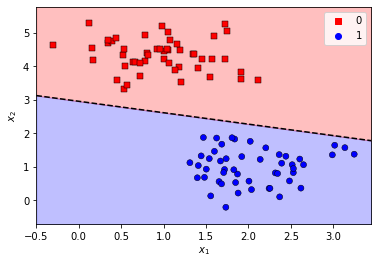

In [7]:
plot_decision_boundary(perceptron, X, y)
plt.savefig('figures/decision_boundaries.pdf')